<a href="https://colab.research.google.com/github/LouisB4455/Lab_LB_ISEP_286000/blob/main/Lab_3_LB_286000_Mpa_mlf_svm_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
import numpy as np
#print(iris.data.shape)
X_2_features = iris.data[:, :2]
#print(X_2_features.data.shape)
#print(X_2_features)
print(iris.target)
#for element in iris.target:
  #if element == 2:
    #iris.target.remove("2")
#print(iris.target)
#Ca ne fonctionne pas le truc ci-dessus
mask = (iris.target != 2)
X_2_features = X_2_features[mask]
y = iris.target[mask]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

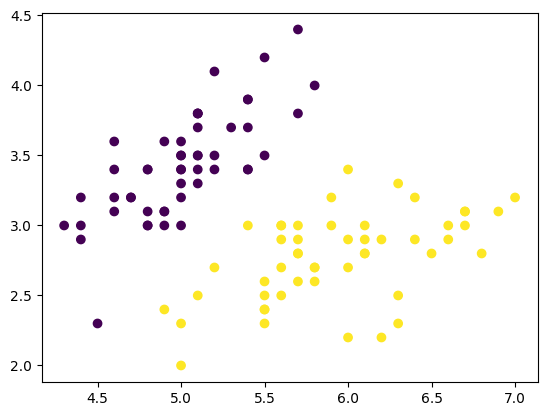

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_2_features[:,0], X_2_features[:,1], c=iris.target)
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
print(y.shape)
SVMmodel=SVC(kernel='linear',C=100)
X_train_1, X_train_2, y_train_2, y_train_2 = train_test_split(X,y,test_size=0.2)
SVMmodel.fit(X_train,y_train)

(100, 2)
(100,)


NameError: name 'SVC' is not defined

Shape of X (2 features, 2 classes): (100, 2)
Shape of y (2 classes): (100,)

SVM Model Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy of SVM on test data: 1.0000

Coefficients W: [ 6.3154899  -5.26238666]
Intercept b: -17.316424920734285


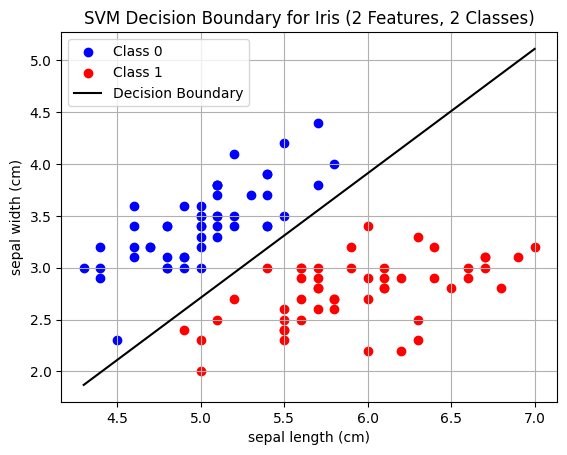

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # Import train_test_split
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib.pyplot

iris=load_iris()

# Filter data to 2 features and 2 classes (0 and 1) as per previous steps
X=iris.data[iris.target!=2,0:2]
y=iris.target[iris.target!=2]

print("Shape of X (2 features, 2 classes):", X.shape)
print("Shape of y (2 classes):", y.shape)

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Correct variable names

# Train an SVM classifier with a linear kernel and C=100 (as per the code's intent)
SVMmodel = SVC(kernel='linear', C=100)
SVMmodel.fit(X_train, y_train)

print("\nSVM Model Parameters:", SVMmodel.get_params())
print(f"Accuracy of SVM on test data: {SVMmodel.score(X_test, y_test):.4f}")

# Get the coefficients and intercept for the decision boundary
W = SVMmodel.coef_[0] # For binary classification, coef_ is (1, n_features)
b = SVMmodel.intercept_[0] # For binary classification, intercept_ is (1,)

print("\nCoefficients W:", W)
print("Intercept b:", b)

# Create a range for the first feature (x1) for plotting the decision boundary
x1_plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)

# Calculate the corresponding x2 values for the decision boundary
# The equation for the decision boundary is W[0]*x1 + W[1]*x2 + b = 0
# So, x2 = (-b - W[0]*x1) / W[1]
x2_plot = (-b - W[0] * x1_plot) / W[1]

# Plot the data points
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')

# Plot the decision boundary
plt.plot(x1_plot, x2_plot, color='black', label='Decision Boundary')

plt.xlabel(iris.feature_names[0]) # Label with sepal length
plt.ylabel(iris.feature_names[1]) # Label with sepal width
plt.title('SVM Decision Boundary for Iris (2 Features, 2 Classes)')
plt.legend()
plt.grid(True)
plt.show()

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [ ]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

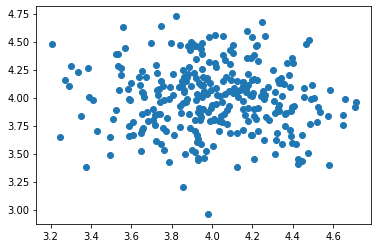

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

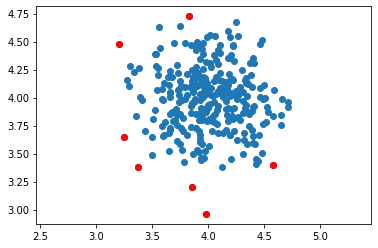

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

NameError: ignored